Importing the Dependencies

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Data Collection and Analysis

In [121]:
#Load Red and White Wine from local drive 
red_wine = pd.read_csv(r'E:\\Erasmus CDE Courses\\Introduction Data Science and Machine Learning\\Assignment Final\\winequality-red.csv')
white_wine = pd.read_csv(r'E:\\Erasmus CDE Courses\\Introduction Data Science and Machine Learning\\Assignment Final\\winequality-white.csv')

#Create type column that store value 0 and 1. 1 means Red and 0 means White
red_wine['type'] = 1
white_wine['type'] = 0

# Combine the Red and White Wine datasets
wine_data = pd.concat([red_wine, white_wine])

In [122]:
# Number of rows & columns in the dataset 
wine_data.shape

(6497, 13)

In [123]:
# first 5 rows of the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [124]:
# checking for missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [125]:
# statistical measures of the dataset that shows Mean, Standard Deviation and others
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


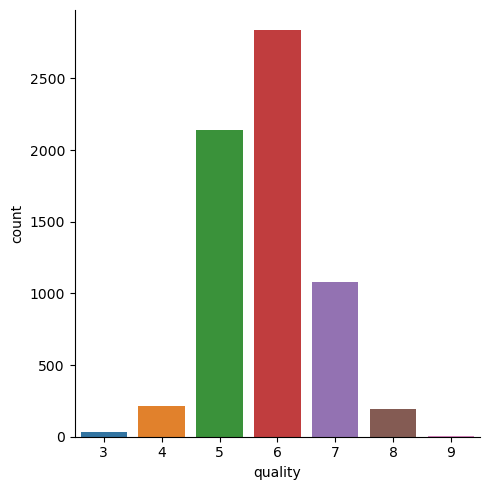

In [126]:
# Distinct number of values for each quality shows in bar plot
sns.catplot(x='quality', data = wine_data, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

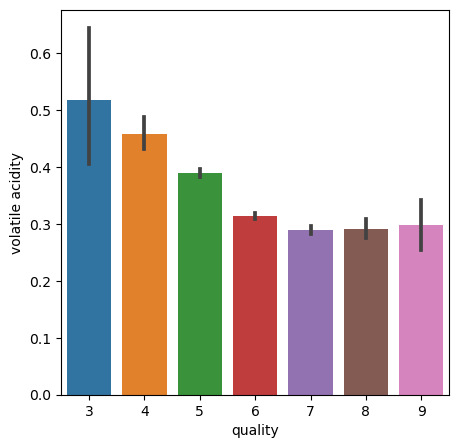

In [127]:
# Correlation Graph between volatile acidity and Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

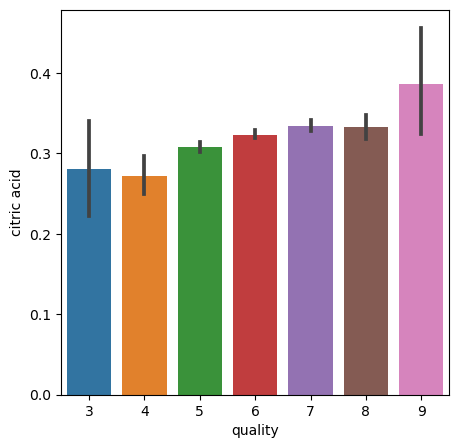

In [128]:
# Correlation Graph between Citric acid and Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_data)

In [129]:
#Positive and Negative Correlation in wine Dataset
correlation = wine_data.corr()

<AxesSubplot:>

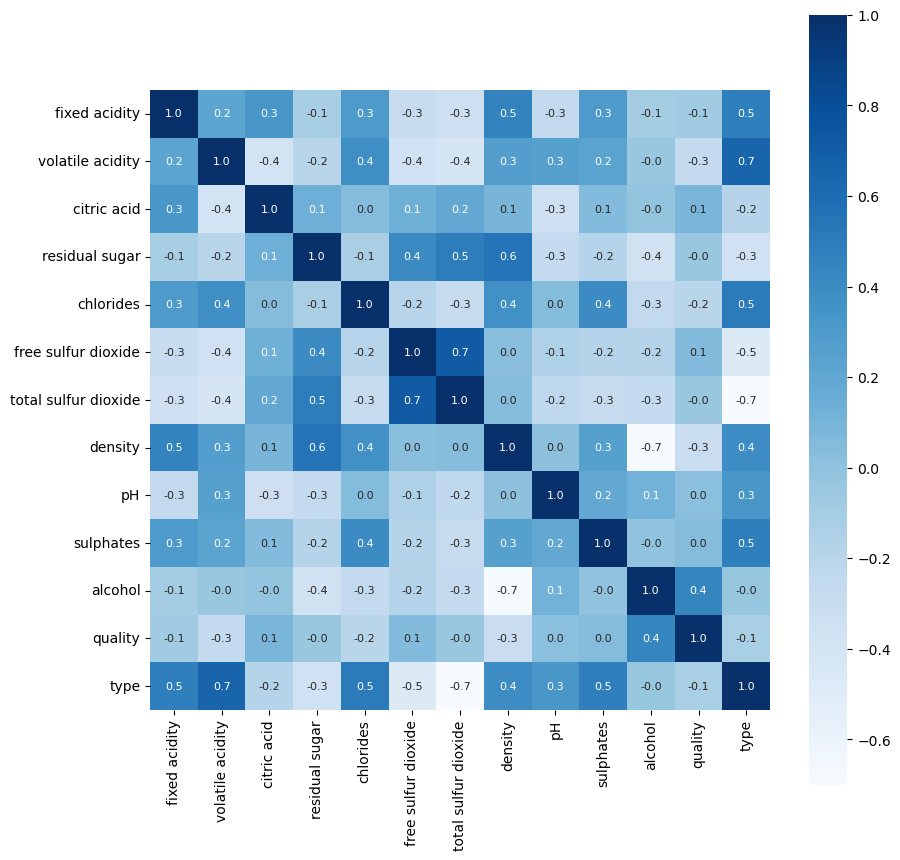

In [130]:
#constructing a heatmap to understand the correlation between the columns
plt.figure( figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [131]:
# separate the data and Label X Contain Independent Variables
X = wine_data.drop('quality',axis=1)

In [132]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [133]:
# Label Y Contain dependent Variables that is Quality in this case
Y = wine_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [134]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 6497, dtype: int64


Train & Test Split

In [135]:
#split the wine datatset and set test size to 20 percent
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state = 3) 

In [136]:
print(Y.shape, Y_train.shape, Y_test.shape)

(6497,) (5197,) (1300,)


Model Training:

Random Forest Classifier

In [137]:
#Store Random Forest Model in Model Variable
model = RandomForestClassifier()

In [138]:
#Fit Model on training Dataset
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation 
Accuracy Assessment

In [139]:
# Apply Model on Test Dataset and Confusion matrix
X_test_prediction = model.predict(X_test)
print(confusion_matrix(Y_test, X_test_prediction))

#test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

[[1017   28]
 [  91  164]]


In [140]:
#Check Accuracy Score of Model using Accuracy Score Function
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy:', test_data_accuracy)

Accuracy: 0.9084615384615384


In [153]:
#Classification Report of the Model means its overall precision, Recall, F1 Score and others 
matrix = classification_report(Y_test, X_test_prediction)
print (matrix)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1045
           1       0.85      0.64      0.73       255

    accuracy                           0.91      1300
   macro avg       0.89      0.81      0.84      1300
weighted avg       0.91      0.91      0.90      1300



Building a Predictive System

In [150]:
#Manually Entering Values of Chemical Properties of Wine
input_data = (7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#Apply Model to predict The Quality of Wine
prediction = model.predict(input_data_reshaped)
print(prediction)

#Condition For Good and Bad Quality
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')


[0]
Bad Quality Wine


C:\Users\Yasir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


End Of Project